In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from google.colab import files
from scipy import stats
from scipy.stats import t, f

In [ ]:
drive.mount('/content/Drive/')

Mounted at /content/Drive/


# 1) model 2 (glbwarm data)

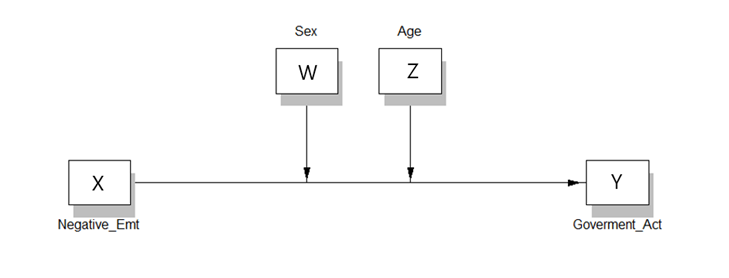

X: Negative_Emotions(기후변화에 대해 부정적인 감정을 갖고 있는 정도)  
Y: Government_Action(기후변화에 대한 정부의 조치를 지지하는 것)  
W: Sex(성별) (여성 - 0, 남성 - 1)  
Z: Age(나이)  


## * 퍼지화 
- X, Y : 설문조사 따라서 1 spread로 삼각퍼지수 생성  
- W, Z : crisp data

In [ ]:
data_2 = pd.read_csv('/content/Drive/MyDrive/논문/model_2.csv', index_col=0)

In [ ]:
data_2.head()

,govact,posemot,negemot,ideology,age,sex,partyid
1,3.6,3.67,4.67,6,61,0,2
2,5.0,2.00,2.33,2,55,0,1
3,6.6,2.33,3.67,1,85,1,1
4,1.0,5.00,5.00,1,59,0,1
5,4.0,2.33,1.67,4,22,1,1


In [ ]:
Z_fuz = np.array([data_2.age, data_2.age, data_2.age]).T

In [ ]:
W_fuz = np.array([data_2.sex, data_2.sex, data_2.sex]).T

In [ ]:
X_fuz = np.array([data_2.negemot - 1, data_2.negemot, data_2.negemot + 1]).T

In [ ]:
row, col = X_fuz.shape

In [ ]:
for i in range(row):    # 1~6 이므로 1보다 작거나 6보다 큰 부분 수정
  if X_fuz[i][0] < 1:
    X_fuz[i][0] = 1
  elif X_fuz[i][2] >6:
    X_fuz[i][2] = 6

In [ ]:
Y_fuz = np.array([data_2.govact - 1, data_2.govact, data_2.govact + 1]).T

In [ ]:
row, col = Y_fuz.shape

In [ ]:
for i in range(row):    # 1~7 이므로 1보다 작거나 7보다 큰 부분 수정
  if X_fuz[i][0] < 1:
    X_fuz[i][0] = 1
  elif X_fuz[i][2] >7:
    X_fuz[i][2] = 7

In [ ]:
one = np.ones((815,3))

In [ ]:
XW_fuz = X_fuz*W_fuz
XZ_fuz = X_fuz*Z_fuz

In [ ]:
X_mat = np.array([one, X_fuz, W_fuz, Z_fuz, XW_fuz, XZ_fuz])
X_mat.shape

(6, 815, 3)

In [ ]:
col, row, tri = X_mat.shape
print(col, row, tri)

6 815 3


In [ ]:
XX = np.zeros((col,col))
for i in range(col):
  for j in range(col):
    sum = 0
    for k in range(row):
      sum = sum + np.dot(X_mat[i][k], X_mat[j][k])
    XX[i][j] = sum

In [ ]:
XY = np.zeros((col, 1))
for i in range(col):
  sum = 0
  for k in range(row):
    sum = sum + np.dot(X_mat[i][k], Y_fuz[k])
  XY[i] = sum

In [ ]:
XX_inv = np.linalg.inv(XX)

In [ ]:
beta = XX_inv @ XY
for i in range(len(beta)):
  print(beta[i])

[3.56820023]
[0.35705256]
[-0.65323578]
[-0.01962873]
[0.17608906]
[0.00425659]


In [ ]:
Y_fuz_hat = 3.5682 + 0.3571 * X_fuz -0.6532* W_fuz - 0.0196 * Z_fuz + 0.1761*X_fuz*W_fuz + 0.0043*X_fuz*Z_fuz

* R^2 & F

In [ ]:
TSS = ((Y_fuz-Y_fuz.mean())**2).sum(axis=1).sum()
SSR = ((Y_fuz_hat-Y_fuz.mean())**2).sum(axis=1).sum()
SSE = ((Y_fuz-Y_fuz_hat)**2).sum(axis=1).sum()

In [ ]:
R = 1 - SSE / TSS
print(R)

0.4601619027534075


In [ ]:
SSR/TSS

0.4630311430931882

In [ ]:
F = (SSR/5) / (SSE/809)
print(F)

138.77945875734642


In [ ]:
f_rv = f(5, 809)

In [ ]:
1 - f_rv.cdf(F) # F-value 

1.1102230246251565e-16

## * 𝑌=4.4748+0.1154𝑋−0.8449𝑊−0.0241𝑍+0.2208𝑋𝑊+0.0054𝑋𝑍  (crisp)
## * 𝑌=3.5682+0.3571𝑋-0.6532𝑊-0.0196𝑍+0.1761𝑋𝑊+0.0043𝑋𝑍  (fuzzy)

----

In [ ]:
cov_mat = XX_inv  # fuzzy (X^tX)^-1 공분산행렬
cov_mat

array([[ 2.78324116e-02, -6.53640455e-03, -2.20106753e-03,
        -4.73598940e-04,  4.65331253e-04,  1.12061194e-04],
       [-6.53640455e-03,  1.81458995e-03,  4.67775059e-04,
         1.12083632e-04, -1.21255789e-04, -3.14474809e-05],
       [-2.20106753e-03,  4.67775059e-04,  1.05801914e-02,
        -7.18688026e-05, -2.48514991e-03,  1.74073437e-05],
       [-4.73598940e-04,  1.12083632e-04, -7.18688026e-05,
         1.00787276e-05,  1.74484735e-05, -2.39118027e-06],
       [ 4.65331253e-04, -1.21255789e-04, -2.48514991e-03,
         1.74484735e-05,  6.95383018e-04, -4.77988079e-06],
       [ 1.12061194e-04, -3.14474809e-05,  1.74073437e-05,
        -2.39118027e-06, -4.77988079e-06,  6.72855169e-07]])

In [ ]:
Y_fuz_hat = 3.5682 + 0.3571 * X_fuz -0.6532* W_fuz - 0.0196 * Z_fuz + 0.1761*X_fuz*W_fuz + 0.0043*X_fuz*Z_fuz
Y_fuz_hat

array([[4.645798, 5.265198, 5.884598],
       [3.279688, 3.873288, 4.466888],
       [3.648529, 4.547229, 5.445929],
       ...,
       [2.3466  , 2.911276, 3.754076],
       [4.055327, 4.567227, 5.079127],
       [5.7368  , 6.6226  , 6.6226  ]])

In [ ]:
Y_fuz

array([[2.6, 3.6, 4.6],
       [4. , 5. , 6. ],
       [5.6, 6.6, 7.6],
       ...,
       [0.6, 1.6, 2.6],
       [4.4, 5.4, 6.4],
       [4.4, 5.4, 6.4]])

In [ ]:
Y_fuz - Y_fuz_hat

array([[-2.045798, -1.665198, -1.284598],
       [ 0.720312,  1.126712,  1.533112],
       [ 1.951471,  2.052771,  2.154071],
       ...,
       [-1.7466  , -1.311276, -1.154076],
       [ 0.344673,  0.832773,  1.320873],
       [-1.3368  , -1.2226  , -0.2226  ]])

In [ ]:
(Y_fuz - Y_fuz_hat) ** 2

array([[4.18528946, 2.77288438, 1.65019202],
       [0.51884938, 1.26947993, 2.3504324 ],
       [3.80823906, 4.21386878, 4.64002187],
       ...,
       [3.05061156, 1.71944475, 1.33189141],
       [0.11879948, 0.69351087, 1.74470548],
       [1.78703424, 1.49475076, 0.04955076]])

In [ ]:
((Y_fuz - Y_fuz_hat) ** 2).sum(axis=1).shape

(815,)

In [ ]:
mse = ((Y_fuz - Y_fuz_hat) ** 2).sum(axis=1).sum() / 809
print(mse)

4.103587907543788


In [ ]:
t_rv = t(df=809)

In [ ]:
se_0 = np.sqrt(cov_mat[0][0] * mse)
se_0

0.33795376552959244

In [ ]:
t_0 = 3.5682 / se_0 # 상수의 t_value
t_0

10.558248979437856

In [ ]:
p_0 = (1 - t_rv.cdf(10.558248979437856)) * 2 # p_value
p_0

0.0

In [ ]:
se_1 = np.sqrt(cov_mat[1][1] * mse)
se_1

0.08629211663341034

In [ ]:
t_1 = 0.3571 / se_1 # t통계량값
t_1

4.138269101881538

In [ ]:
p_1 = (1 - t_rv.cdf(4.138269101881538)) * 2 # p_value
p_1

3.8659770518867376e-05

In [ ]:
se_2 = np.sqrt(cov_mat[2][2] * mse)
se_2

0.20836685267133068

In [ ]:
t_2 = -0.6532 / se_2 # t통계량값
t_2

-3.134855624230841

In [ ]:
p_2 = (t_rv.cdf(-3.134855624230841)) * 2 # p_value
p_2

0.0017814814740839385

In [ ]:
se_3 = np.sqrt(cov_mat[3][3] * mse)
se_3

0.006431092017836865

In [ ]:
t_3 = -0.0196 / se_3 # t통계량값
t_3

-3.047693913512463

In [ ]:
p_3 = (t_rv.cdf(-3.047693913512463)) * 2 # p_value
p_3

0.0023810505327808693

In [ ]:
se_4 = np.sqrt(cov_mat[4][4] * mse)
se_4

0.05341877332003833

In [ ]:
t_4 = 0.1761 / se_4 # t통계량값
t_4

3.296593857462125

In [ ]:
p_4 = (1 - t_rv.cdf(3.296593857462125)) * 2 # p_value
p_4

0.001021313712599392

In [ ]:
se_5 = np.sqrt(cov_mat[5][5] * mse)
se_5

0.001661661919561159

In [ ]:
t_5 = 0.0043 / se_5 # t통계량값
t_5

2.5877706827003775

In [ ]:
p_5 = (1 - t_rv.cdf(2.5877706827003775)) * 2 # p_value
p_5

0.009833150583631323

In [ ]:
print(p_0)
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)

0.0
3.8659770518867376e-05
0.0017814814740839385
0.0023810505327808693
0.001021313712599392
0.009833150583631323


## * 𝑌=4.4748+0.1154𝑋−0.8449𝑊−0.0241𝑍+0.2208𝑋𝑊+0.0054𝑋𝑍  (crisp)
## * 𝑌=3.5682+0.3571𝑋-0.6532𝑊-0.0196𝑍+0.1761𝑋𝑊+0.0043𝑋𝑍  (fuzzy)

----

# 2) model 3 (glbwarm data)

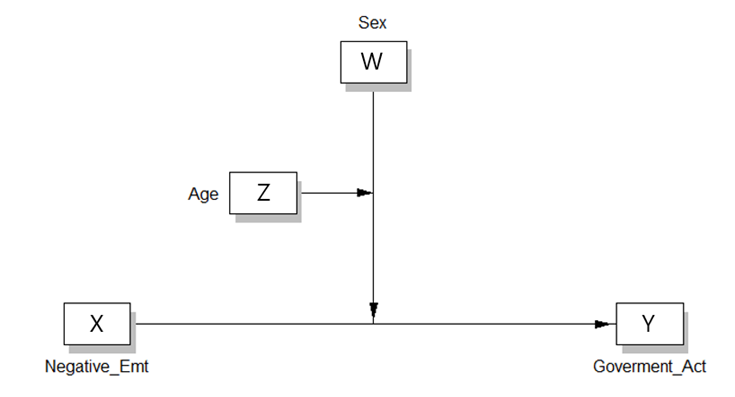

X: Negative_Emotions(기후변화에 대해 부정적인 감정을 갖고 있는 정도)  
Y: Government_Action(기후변화에 대한 정부의 조치를 지지하는 것)  
W: Sex(성별) (여성 - 0, 남성 - 1)  
Z: Age(나이)  


In [ ]:
WZ_fuz = W_fuz * Z_fuz
XWZ_fuz = X_fuz * W_fuz * Z_fuz

In [ ]:
X_mat = np.array([one, X_fuz, W_fuz, Z_fuz, XW_fuz, XZ_fuz, WZ_fuz, XWZ_fuz])
X_mat.shape

(8, 815, 3)

In [ ]:
col, row, tri = X_mat.shape
print(col, row, tri)

8 815 3


In [ ]:
XX = np.zeros((col,col))
for i in range(col):
  for j in range(col):
    sum = 0
    for k in range(row):
      sum = sum + np.dot(X_mat[i][k], X_mat[j][k])
    XX[i][j] = sum

In [ ]:
XY = np.zeros((col, 1))
for i in range(col):
  sum = 0
  for k in range(row):
    sum = sum + np.dot(X_mat[i][k], Y_fuz[k])
  XY[i] = sum

In [ ]:
XX_inv = np.linalg.inv(XX)

In [ ]:
beta = XX_inv @ XY
for i in range(len(beta)):
  print(beta[i])

[2.94758149]
[0.50451951]
[0.45947861]
[-0.00642049]
[-0.09277373]
[0.00111032]
[-0.02229994]
[0.00539065]


In [ ]:
Y_fuz_hat = 2.9476+0.5045*X_fuz+0.4595*W_fuz-0.0064*Z_fuz-0.0928*X_fuz*W_fuz+0.0011*X_fuz*Z_fuz-0.0223*W_fuz*Z_fuz+0.0054*X_fuz*W_fuz*Z_fuz

* R^2 & F

In [ ]:
TSS = ((Y_fuz-Y_fuz.mean())**2).sum(axis=1).sum()
SSR = ((Y_fuz_hat-Y_fuz.mean())**2).sum(axis=1).sum()
SSE = ((Y_fuz-Y_fuz_hat)**2).sum(axis=1).sum()

In [ ]:
R = 1 - SSE / TSS
print(R)

0.4621431093835787


In [ ]:
F = (SSR/7) / (SSE/807)
print(F)

98.96139722122743


In [ ]:
f_rv = f(7, 807)

In [ ]:
1 - f_rv.cdf(F) # F-value 

1.1102230246251565e-16

## * 𝑌=3.6733+0.3120𝑋+0.5985𝑊−0.0071𝑍−0.1413𝑋𝑊+0.0012𝑋𝑍−0.0287𝑊𝑍+0.0072𝑋𝑊𝑍 (crisp)
## * 𝑌=2.9476+0.5045𝑋+0.4595𝑊−0.0064𝑍-0.0928𝑋𝑊+0.0011𝑋𝑍-0.0223𝑊𝑍+0.0054𝑋𝑊𝑍 (fuzzy)

----

In [ ]:
cov_mat = XX_inv  # fuzzy (X^tX)^-1 공분산행렬

In [ ]:
Y_fuz_hat = 2.9476+0.5045*X_fuz+0.4595*W_fuz-0.0064*Z_fuz-0.0928*X_fuz*W_fuz+0.0011*X_fuz*Z_fuz-0.0223*W_fuz*Z_fuz+0.0054*X_fuz*W_fuz*Z_fuz

In [ ]:
mse = ((Y_fuz - Y_fuz_hat) ** 2).sum(axis=1).sum() / 807  # 자유도 815 - 8
print(mse)

4.098660392312818


In [ ]:
t_rv = t(df=807)

In [ ]:
se_0 = np.sqrt(cov_mat[0][0] * mse)
se_0

0.4975160154656975

In [ ]:
t_0 = 2.9476 / se_0 # 상수의 t_value
t_0

5.924633395451426

In [ ]:
p_0 = (1 - t_rv.cdf(t_0)) * 2 # p_value
p_0

4.6321690927442205e-09

In [ ]:
se_1 = np.sqrt(cov_mat[1][1] * mse)
se_1

0.12473129766683666

In [ ]:
t_1 = 0.5045 / se_1 # t통계량값
t_1

4.044694550902083

In [ ]:
p_1 = (1 - t_rv.cdf(t_1)) * 2 # p_value
p_1

5.741914150059202e-05

In [ ]:
se_2 = np.sqrt(cov_mat[2][2] * mse)
se_2

0.6856792163691621

In [ ]:
t_2 = 0.4595 / se_2 # t통계량값
t_2

0.6701384394194768

In [ ]:
p_2 = (1- t_rv.cdf(t_2)) * 2 # p_value
p_2

0.5029612543679511

In [ ]:
se_3 = np.sqrt(cov_mat[3][3] * mse)
se_3

0.010084373269480388

In [ ]:
t_3 = -0.0064 / se_3 # t통계량값
t_3

-0.6346452901906288

In [ ]:
p_3 = (t_rv.cdf(t_3)) * 2 # p_value
p_3

0.5258396570152476

In [ ]:
se_4 = np.sqrt(cov_mat[4][4] * mse)
se_4

0.17571637338906834

In [ ]:
t_4 = -0.0928 / se_4 # t통계량값
t_4

-0.5281238066217298

In [ ]:
p_4 = (t_rv.cdf(t_4)) * 2 # p_value
p_4

0.5975585970504016

In [ ]:
se_5 = np.sqrt(cov_mat[5][5] * mse)
se_5

0.0025433641643564857

In [ ]:
t_5 = 0.0011 / se_5 # t통계량값
t_5

0.43249803367356904

In [ ]:
p_5 = (1 - t_rv.cdf(t_5)) * 2 # p_value
p_5

0.6654950295224618

In [ ]:
se_6 = np.sqrt(cov_mat[6][6] * mse)
se_6

0.013092619415214786

In [ ]:
t_6 = -0.0223 / se_6 # t통계량값
t_6

-1.7032496930358658

In [ ]:
p_6 = (t_rv.cdf(t_6)) * 2 # p_value
p_6

0.0889063781869506

In [ ]:
se_7 = np.sqrt(cov_mat[7][7] * mse)
se_7

0.003363390071936252

In [ ]:
t_7 = 0.0054 / se_7 # t통계량값
t_7

1.6055229647780054

In [ ]:
p_7 = (1 - t_rv.cdf(t_7)) * 2 # p_value
p_7

0.10876997968313207

In [ ]:
print(p_0)
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
print(p_7)

4.6321690927442205e-09
5.741914150059202e-05
0.5029612543679511
0.5258396570152476
0.5975585970504016
0.6654950295224618
0.0889063781869506
0.10876997968313207


## * 𝑌=3.6733+0.3120𝑋+0.5985𝑊−0.0071𝑍−0.1413𝑋𝑊+0.0012𝑋𝑍−0.0287𝑊𝑍+0.0072𝑋𝑊𝑍 (crisp)
## * 𝑌=2.9476+0.5045𝑋+0.4595𝑊−0.0064𝑍-0.0928𝑋𝑊+0.0011𝑋𝑍-0.0223𝑊𝑍+0.0054𝑋𝑊𝑍 (fuzzy)

----

# 3) model 16 (bike data)

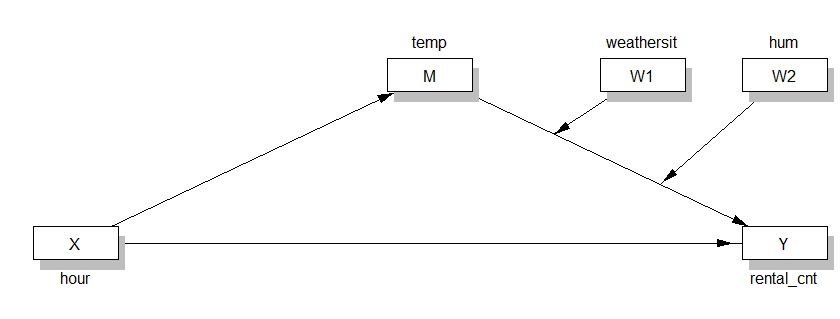

X: hour(시간)  
M: temp(기온)  
Y: rental_cnt(자전거 렌탈횟수)  
W: weathersit  
Z: hum(습도)

---- 
weathersit
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy  
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist  
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog  


## * 퍼지화 
- M, Z : 연속적인 시계열 데이터이므로 spread를 (다음값 - 현재값) / 2 로 사용하여 삼각퍼지숫자 생성  
(마지막 data는 직전 spread 사용)  
- X, Y : crisp data
- W : 1~4 척도를 가지고 측정했으므로 설문조사와 같은 이유로 1 spread 사용하여 삼각퍼지숫자 생성

In [ ]:
data_16 = pd.read_csv('/content/Drive/MyDrive/논문/model_16_bike.csv')
data_16.head()

,dteday,hr,weathersit,temp,atemp,hum,windspeed,casual,cnt
0,2011-01-01,1,1,0.22,0.2727,0.80,0.0,8,0.040000
1,2011-01-01,2,1,0.22,0.2727,0.80,0.0,5,0.031795
2,2011-01-01,4,1,0.24,0.2879,0.75,0.0,0,0.000000
3,2011-01-01,6,1,0.22,0.2727,0.80,0.0,2,0.001026
4,2011-01-01,7,1,0.20,0.2576,0.86,0.0,1,0.002051


* temp, hum 퍼지화

In [ ]:
data = data_16['temp']
M_fuz = []
for i in range(len(data)-1):
  spread = np.abs(data[i] - data[i+1]) / 2
  M_fuz.append([data[i] - spread, data[i], data[i] + spread])
M_fuz.append([data[len(data)-1] - spread, data[len(data)-1], data[len(data)-1] + spread])

In [ ]:
M_fuz = np.array(M_fuz)
M_fuz

array([[0.22, 0.22, 0.22],
       [0.21, 0.22, 0.23],
       [0.23, 0.24, 0.25],
       ...,
       [0.26, 0.26, 0.26],
       [0.26, 0.26, 0.26],
       [0.26, 0.26, 0.26]])

In [ ]:
data = data_16['hum']
Z_fuz = []
for i in range(len(data)-1):
  spread = np.abs(data[i] - data[i+1]) / 2
  Z_fuz.append([data[i] - spread, data[i], data[i] + spread])
Z_fuz.append([data[len(data)-1] - spread, data[len(data)-1], data[len(data)-1] + spread])

In [ ]:
Z_fuz = np.array(Z_fuz)
Z_fuz

array([[0.8  , 0.8  , 0.8  ],
       [0.775, 0.8  , 0.825],
       [0.725, 0.75 , 0.775],
       ...,
       [0.6  , 0.6  , 0.6  ],
       [0.575, 0.6  , 0.625],
       [0.625, 0.65 , 0.675]])

* weathersit 퍼지화

In [ ]:
W_fuz = np.array([data_16['weathersit'] - 1, data_16['weathersit'], data_16['weathersit'] + 1]).T
W_fuz

array([[0, 1, 2],
       [0, 1, 2],
       [0, 1, 2],
       ...,
       [1, 2, 3],
       [0, 1, 2],
       [0, 1, 2]])

In [ ]:
row, col = W_fuz.shape

In [ ]:
for i in range(row):    # 1~4 이므로 1보다 작거나 4보다 큰 부분 수정
  if W_fuz[i][0] < 1:
    W_fuz[i][0] = 1
  elif W_fuz[i][2] >4:
    W_fuz[i][2] = 4

* hour, rental_cnt crisp

In [ ]:
X_fuz = np.array([data_16['hr'], data_16['hr'], data_16['hr']]).T
X_fuz

array([[ 1,  1,  1],
       [ 2,  2,  2],
       [ 4,  4,  4],
       ...,
       [19, 19, 19],
       [21, 21, 21],
       [23, 23, 23]])

In [ ]:
Y_fuz = np.array([data_16['cnt'], data_16['cnt'], data_16['cnt']]).T
Y_fuz

array([[0.04      , 0.04      , 0.04      ],
       [0.03179487, 0.03179487, 0.03179487],
       [0.        , 0.        , 0.        ],
       ...,
       [0.12102564, 0.12102564, 0.12102564],
       [0.09128205, 0.09128205, 0.09128205],
       [0.04923077, 0.04923077, 0.04923077]])

In [ ]:
Y_fuz.shape

(10948, 3)

In [ ]:
one = np.ones((10948,3))

In [ ]:
MW_fuz = M_fuz * W_fuz
MZ_fuz = M_fuz * Z_fuz

* M(temp)

In [ ]:
X_mat = np.array([one, X_fuz])
X_mat.shape

(2, 10948, 3)

In [ ]:
col, row, tri = X_mat.shape
print(col, row, tri)

2 10948 3


In [ ]:
XX = np.zeros((col,col))
for i in range(col):
  for j in range(col):
    sum = 0
    for k in range(row):
      sum = sum + np.dot(X_mat[i][k], X_mat[j][k])
    XX[i][j] = sum

In [ ]:
XY = np.zeros((col, 1))
for i in range(col):
  sum = 0
  for k in range(row):
    sum = sum + np.dot(X_mat[i][k], M_fuz[k])
  XY[i] = sum

In [ ]:
XX_inv = np.linalg.inv(XX)

In [ ]:
beta_Y = XX_inv @ XY
for i in range(len(beta_Y)):
  print(beta_Y[i])

[0.45200025]
[0.0039908]


In [ ]:
cov_mat = XX_inv
cov_mat

array([[ 1.15892012e-04, -7.37610523e-06],
       [-7.37610523e-06,  6.36747568e-07]])

In [ ]:
M_fuz_hat = 0.4520+0.0040*X_fuz
M_fuz_hat

array([[0.456, 0.456, 0.456],
       [0.46 , 0.46 , 0.46 ],
       [0.468, 0.468, 0.468],
       ...,
       [0.528, 0.528, 0.528],
       [0.536, 0.536, 0.536],
       [0.544, 0.544, 0.544]])

In [ ]:
mse = ((M_fuz - M_fuz_hat) ** 2).sum(axis=1).sum() / 10946
print(mse)

0.10980165759181436


In [ ]:
t_rv = t(df=10946)

In [ ]:
se_0 = np.sqrt(cov_mat[0][0] * mse)
se_0

0.003567230726151537

In [ ]:
t_0 = 0.4520 / se_0 # 상수의 t_value
t_0

126.70893325917122

In [ ]:
p_0 = (1 - t_rv.cdf(t_0)) * 2 # p_value
p_0

0.0

In [ ]:
se_1 = np.sqrt(cov_mat[1][1] * mse)
se_1

0.00026441622193748847

In [ ]:
t_1 = 0.0040 / se_1 # t통계량값
t_1

15.127664901534118

In [ ]:
p_1 = (1-t_rv.cdf(t_1)) * 2 # p_value
p_1

0.0

In [ ]:
print(p_0)
print(p_1)

0.0
0.0


----

* Y(rental_cnt)

In [ ]:
X_mat = np.array([one, X_fuz, M_fuz, W_fuz, Z_fuz, MW_fuz, MZ_fuz])
X_mat.shape

(7, 10948, 3)

In [ ]:
col, row, tri = X_mat.shape
print(col, row, tri)

7 10948 3


In [ ]:
XX = np.zeros((col,col))
for i in range(col):
  for j in range(col):
    sum = 0
    for k in range(row):
      sum = sum + np.dot(X_mat[i][k], X_mat[j][k])
    XX[i][j] = sum

In [ ]:
XY = np.zeros((col, 1))
for i in range(col):
  sum = 0
  for k in range(row):
    sum = sum + np.dot(X_mat[i][k], Y_fuz[k])
  XY[i] = sum

In [ ]:
XX_inv = np.linalg.inv(XX)

In [ ]:
beta_Y = XX_inv @ XY
for i in range(len(beta_Y)):
  print(beta_Y[i])

[-0.06685666]
[0.00748701]
[0.62020441]
[-0.02202123]
[0.08916072]
[0.04109469]
[-0.60264368]


In [ ]:
Y_fuz_hat = -0.0669+0.0075*X_fuz+0.6202*M_fuz-0.0220*W_fuz+0.0891*Z_fuz+0.0411*M_fuz*W_fuz-0.6026*M_fuz*Z_fuz

* R^2 & F

In [ ]:
TSS = ((Y_fuz-Y_fuz.mean())**2).sum(axis=1).sum()
SSR = ((Y_fuz_hat-Y_fuz.mean())**2).sum(axis=1).sum()
SSE = ((Y_fuz-Y_fuz_hat)**2).sum(axis=1).sum()

In [ ]:
R = 1 - SSE / TSS
print(R)

0.33073091900525087


In [ ]:
F = (SSR/6) / (SSE/10941)
print(F)

902.2165172007217


In [ ]:
f_rv = f(6, 10941)

In [ ]:
1 - f_rv.cdf(F) # F-value 

1.1102230246251565e-16

----

In [ ]:
cov_mat = XX_inv

In [ ]:
Y_fuz_hat = -0.0669+0.0075*X_fuz+0.6202*M_fuz-0.0220*W_fuz+0.0891*Z_fuz+0.0411*M_fuz*W_fuz-0.6026*M_fuz*Z_fuz

In [ ]:
mse = ((Y_fuz - Y_fuz_hat) ** 2).sum(axis=1).sum() / 10941
print(mse)

0.0704167312974218


In [ ]:
t_rv = t(df=10941)

In [ ]:
se_0 = np.sqrt(cov_mat[0][0] * mse)
se_0

0.014422145997956501

In [ ]:
t_0 = -0.0669 / se_0 # 상수의 t_value
t_0

-4.638699400871353

In [ ]:
p_0 = (t_rv.cdf(t_0)) * 2 # p_value
p_0

3.5467501932434543e-06

In [ ]:
se_1 = np.sqrt(cov_mat[1][1] * mse)
se_1

0.00022314211457773409

In [ ]:
t_1 = 0.0075 / se_1 # t통계량값
t_1

33.610867290527935

In [ ]:
p_1 = (1 - t_rv.cdf(t_1)) * 2 # p_value
p_1

0.0

In [ ]:
se_2 = np.sqrt(cov_mat[2][2] * mse)
se_2

0.026587809188226667

In [ ]:
t_2 = 0.6202 / se_2 # t통계량값
t_2

23.326480027343898

In [ ]:
p_2 = (1- t_rv.cdf(t_2)) * 2 # p_value
p_2

0.0

In [ ]:
se_3 = np.sqrt(cov_mat[3][3] * mse)
se_3

0.007011964346546178

In [ ]:
t_3 = -0.0220 / se_3 # t통계량값
t_3

-2.181593185030286

In [ ]:
p_3 = (t_rv.cdf(t_3)) * 2 # p_value
p_3

0.02916077979661708

In [ ]:
se_4 = np.sqrt(cov_mat[4][4] * mse)
se_4

0.02320275078062958

In [ ]:
t_4 = 0.0891 / se_4 # t통계량값
t_4

3.840061932414652

In [ ]:
p_4 = (1-t_rv.cdf(t_4)) * 2 # p_value
p_4

0.00012369687152125053

In [ ]:
se_5 = np.sqrt(cov_mat[5][5] * mse)
se_5

0.01077830907316189

In [ ]:
t_5 = 0.0411 / se_5 # t통계량값
t_5

3.8132140877588543

In [ ]:
p_5 = (1 - t_rv.cdf(t_5)) * 2 # p_value
p_5

0.00013792445415572452

In [ ]:
se_6 = np.sqrt(cov_mat[6][6] * mse)
se_6

0.04378537917847864

In [ ]:
t_6 = -0.6026 / se_6 # t통계량값
t_6

-13.762584938311772

In [ ]:
p_6 = (t_rv.cdf(t_6)) * 2 # p_value
p_6

9.70657419980574e-43

In [ ]:
print(p_0)
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)

3.5467501932434543e-06
0.0
0.0
0.02916077979661708
0.00012369687152125053
0.00013792445415572452
9.70657419980574e-43


## * 𝑀=0.4520+0.0040𝑋 (crisp)
## * 𝑌=−0.0745+0.0075𝑋+0.6419𝑀−0.0311𝑊+0.1165𝑍+0.0528𝑀𝑊−0.6545𝑀𝑍 (crisp)

  
## * 𝑀=0.4520+0.0040𝑋 (fuzzy)
## * 𝑌=−0.0669+0.0075𝑋+0.6202𝑀−0.0220𝑊+0.0891𝑍+0.0411𝑀𝑊−0.6026𝑀𝑍 (fuzzy)

----

# 4) model 11(Binladen data)

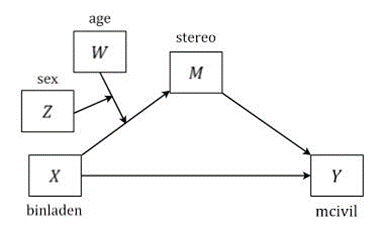

X : news_content(0: 빈라덴죽음 발표 전, 1: 빈라덴죽음 들었을 때)  
M : stereo(미국의 사는 무슬림에 대한 부정적인 고정관념에 대한 지지정도 평균)  
Y : mcivil(미국의 사는 무슬림의 자유제한 지지정도 평균)  
W : age(나이) ex) 7.5 -> 75살   
Z : sex(성별, 0: female, 1: male) 



## * 퍼지화 
- X, W, Z : crisp data
- M, Y : 1~5 척도를 가지고 측정했으므로 1 spread 사용하여 삼각퍼지숫자 생성

In [ ]:
data_11 = pd.read_csv('/content/Drive/MyDrive/논문/model_11.csv')
data_11.head()

,news_content,rthreat,stereo,mcivil,age,ideo,sex
0,0,3.00,2.8,2.8,7.5,8,0
1,1,2.00,1.8,3.2,3.3,4,1
2,1,2.25,2.0,2.8,5.6,6,0
3,1,2.00,2.6,3.4,4.0,5,1
4,1,4.00,4.2,4.0,5.9,8,1


In [ ]:
len(data_11)

661

* stereo, mcivil 퍼지화

In [ ]:
M_fuz = np.array([data_11['stereo'] - 1, data_11['stereo'], data_11['stereo'] + 1]).T
M_fuz

array([[1.8, 2.8, 3.8],
       [0.8, 1.8, 2.8],
       [1. , 2. , 3. ],
       ...,
       [1.6, 2.6, 3.6],
       [3.2, 4.2, 5.2],
       [3.6, 4.6, 5.6]])

In [ ]:
row, col = M_fuz.shape

In [ ]:
for i in range(row):    # 1~5 이므로 1보다 작거나 5보다 큰 부분 수정
  if M_fuz[i][0] < 1:
    M_fuz[i][0] = 1
  elif M_fuz[i][2] >5:
    M_fuz[i][2] = 5

In [ ]:
Y_fuz = np.array([data_11['mcivil'] - 1, data_11['mcivil'], data_11['mcivil'] + 1]).T
Y_fuz

array([[1.8, 2.8, 3.8],
       [2.2, 3.2, 4.2],
       [1.8, 2.8, 3.8],
       ...,
       [1.6, 2.6, 3.6],
       [1.6, 2.6, 3.6],
       [3. , 4. , 5. ]])

In [ ]:
for i in range(row):    # 1~5 이므로 1보다 작거나 5보다 큰 부분 수정
  if Y_fuz[i][0] < 1:
    Y_fuz[i][0] = 1
  elif Y_fuz[i][2] >5:
    Y_fuz[i][2] = 5

* news_content, age, sex crisp

In [ ]:
X_fuz = np.array([data_11['news_content'], data_11['news_content'], data_11['news_content']]).T
X_fuz

array([[0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       ...,
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0]])

In [ ]:
W_fuz = np.array([data_11['age'], data_11['age'], data_11['age']]).T
W_fuz

array([[7.5, 7.5, 7.5],
       [3.3, 3.3, 3.3],
       [5.6, 5.6, 5.6],
       ...,
       [3.5, 3.5, 3.5],
       [4.7, 4.7, 4.7],
       [5.8, 5.8, 5.8]])

In [ ]:
Z_fuz = np.array([data_11['sex'], data_11['sex'], data_11['sex']]).T
Z_fuz

array([[0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       ...,
       [1, 1, 1],
       [0, 0, 0],
       [0, 0, 0]])

In [ ]:
Y_fuz.shape

(661, 3)

In [ ]:
one = np.ones((661,3))

In [ ]:
XW_fuz = X_fuz * W_fuz
XZ_fuz = X_fuz * Z_fuz
WZ_fuz = W_fuz * Z_fuz
XWZ_fuz = X_fuz * W_fuz * Z_fuz

* M(stereo)

In [ ]:
X_mat = np.array([one, X_fuz, W_fuz, Z_fuz, XW_fuz, XZ_fuz, WZ_fuz, XWZ_fuz])
X_mat.shape

(8, 661, 3)

In [ ]:
col, row, tri = X_mat.shape
print(col, row, tri)

8 661 3


In [ ]:
XX = np.zeros((col,col))
for i in range(col):
  for j in range(col):
    sum = 0
    for k in range(row):
      sum = sum + np.dot(X_mat[i][k], X_mat[j][k])
    XX[i][j] = sum

In [ ]:
XY = np.zeros((col, 1))
for i in range(col):
  sum = 0
  for k in range(row):
    sum = sum + np.dot(X_mat[i][k], M_fuz[k])
  XY[i] = sum

In [ ]:
XX_inv = np.linalg.inv(XX)

In [ ]:
beta_M = XX_inv @ XY
for i in range(len(beta_M)):
  print(beta_M[i])

[2.29325402]
[1.11254948]
[0.10963958]
[0.29085336]
[-0.18865943]
[-1.20904456]
[-0.04158585]
[0.22070134]


In [ ]:
cov_mat = XX_inv

In [ ]:
cov_mat.shape

(8, 8)

In [ ]:
M_fuz_hat = 2.2933+1.1125*X_fuz+0.1096*W_fuz+0.2909*Z_fuz-0.1887*X_fuz*W_fuz-1.2090*X_fuz*Z_fuz-0.0416*W_fuz*Z_fuz+0.2207*X_fuz*W_fuz*Z_fuz

In [ ]:
mse = ((M_fuz - M_fuz_hat) ** 2).sum(axis=1).sum() / 653
print(mse)

3.6651852782727414


In [ ]:
M_fuz

array([[1.8, 2.8, 3.8],
       [1. , 1.8, 2.8],
       [1. , 2. , 3. ],
       ...,
       [1.6, 2.6, 3.6],
       [3.2, 4.2, 5. ],
       [3.6, 4.6, 5. ]])

In [ ]:
t_rv = t(df=653)

In [ ]:
se_0 = np.sqrt(cov_mat[0][0] * mse)
se_0

0.2554333961472231

In [ ]:
t_0 = 2.2933 / se_0 # 상수의 t_value
t_0

8.978074263547825

In [ ]:
p_0 = (1 - t_rv.cdf(t_0)) * 2 # p_value
p_0

0.0

In [ ]:
se_1 = np.sqrt(cov_mat[1][1] * mse)
se_1

0.4141128277151506

In [ ]:
t_1 = 1.1125 / se_1 # t통계량값
t_1

2.686465923159565

In [ ]:
p_1 = (1 - t_rv.cdf(t_1)) * 2 # p_value
p_1

0.007404937010187185

In [ ]:
se_2 = np.sqrt(cov_mat[2][2] * mse)
se_2

0.047451563466625296

In [ ]:
t_2 = 0.1096 / se_2 # t통계량값
t_2

2.3097236843857916

In [ ]:
p_2 = (1- t_rv.cdf(t_2)) * 2 # p_value
p_2

0.021214488988543057

In [ ]:
se_3 = np.sqrt(cov_mat[3][3] * mse)
se_3

0.3469108579686421

In [ ]:
t_3 = 0.2909 / se_3 # t통계량값
t_3

0.8385439467169834

In [ ]:
p_3 = (1-t_rv.cdf(t_3)) * 2 # p_value
p_3

0.40203211768403424

In [ ]:
se_4 = np.sqrt(cov_mat[4][4] * mse)
se_4

0.0771926271670897

In [ ]:
t_4 = -0.1887 / se_4 # t통계량값
t_4

-2.444533978504755

In [ ]:
p_4 = (t_rv.cdf(t_4)) * 2 # p_value
p_4

0.01476730134907905

In [ ]:
se_5 = np.sqrt(cov_mat[5][5] * mse)
se_5

0.5530074543110985

In [ ]:
t_5 = -1.2090 / se_5 # t통계량값
t_5

-2.1862273113589312

In [ ]:
p_5 = (t_rv.cdf(t_5)) * 2 # p_value
p_5

0.029153266613617047

In [ ]:
se_6 = np.sqrt(cov_mat[6][6] * mse)
se_6

0.06749753883864772

In [ ]:
t_6 = -0.0416 / se_6 # t통계량값
t_6

-0.6163187682953069

In [ ]:
p_6 = (t_rv.cdf(t_6)) * 2 # p_value
p_6

0.5378989398013642

In [ ]:
se_7 = np.sqrt(cov_mat[7][7] * mse)
se_7

0.10774861283965304

In [ ]:
t_7 = 0.2207 / se_7 # t통계량값
t_7

2.0482862301757563

In [ ]:
p_7 = (1 - t_rv.cdf(t_7)) * 2 # p_value
p_7

0.04093129990199773

In [ ]:
print(p_0)
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
print(p_7)

0.0
0.007404937010187185
0.021214488988543057
0.40203211768403424
0.01476730134907905
0.029153266613617047
0.5378989398013642
0.04093129990199773


----

* Y(mcivil)

In [ ]:
X_mat = np.array([one, X_fuz, M_fuz])
X_mat.shape

(3, 661, 3)

In [ ]:
col, row, tri = X_mat.shape
print(col, row, tri)

3 661 3


In [ ]:
XX = np.zeros((col,col))
for i in range(col):
  for j in range(col):
    sum = 0
    for k in range(row):
      sum = sum + np.dot(X_mat[i][k], X_mat[j][k])
    XX[i][j] = sum

In [ ]:
XY = np.zeros((col, 1))
for i in range(col):
  sum = 0
  for k in range(row):
    sum = sum + np.dot(X_mat[i][k], Y_fuz[k])
  XY[i] = sum

In [ ]:
XX_inv = np.linalg.inv(XX)

In [ ]:
beta_Y = XX_inv @ XY
for i in range(len(beta_Y)):
  print(beta_Y[i])

[0.52250555]
[-0.06260827]
[0.73968045]


In [ ]:
Y_fuz_hat = 0.5225-0.0626*X_fuz+0.7397*M_fuz

* R^2 & F

In [ ]:
TSS = ((Y_fuz-Y_fuz.mean())**2).sum(axis=1).sum()
SSR = ((Y_fuz_hat-Y_fuz.mean())**2).sum(axis=1).sum()
SSE = ((Y_fuz-Y_fuz_hat)**2).sum(axis=1).sum()

In [ ]:
R = 1 - SSE / TSS
print(R)

0.48115967087215583


In [ ]:
F = (SSR/2) / (SSE/658)
print(F)

305.12260527496574


In [ ]:
f_rv = f(2, 658)

In [ ]:
1 - f_rv.cdf(F) # F-value 

1.1102230246251565e-16

----

In [ ]:
cov_mat = XX_inv

In [ ]:
Y_fuz_hat = 0.5225-0.0626*X_fuz+0.7397*M_fuz

In [ ]:
mse = ((Y_fuz - Y_fuz_hat) ** 2).sum(axis=1).sum() / 658
print(mse)

2.186593763582979


In [ ]:
t_rv = t(df=658)

In [ ]:
se_0 = np.sqrt(cov_mat[0][0] * mse)
se_0

0.09637610567258213

In [ ]:
t_0 = 0.5225 / se_0 # 상수의 t_value
t_0

5.42146828151664

In [ ]:
p_0 = (1 - t_rv.cdf(t_0)) * 2 # p_value
p_0

8.307564947074297e-08

In [ ]:
se_1 = np.sqrt(cov_mat[1][1] * mse)
se_1

0.0675783346905535

In [ ]:
t_1 = -0.0626 / se_1 # t통계량값
t_1

-0.9263323857660939

In [ ]:
p_1 = (t_rv.cdf(t_1)) * 2 # p_value
p_1

0.35461289544800334

In [ ]:
se_2 = np.sqrt(cov_mat[2][2] * mse)
se_2

0.029943999699572725

In [ ]:
t_2 = 0.7397 / se_2 # t통계량값
t_2

24.70277876774608

In [ ]:
p_2 = (1- t_rv.cdf(t_2)) * 2 # p_value
p_2

0.0

In [ ]:
print(p_0)
print(p_1)
print(p_2)

8.307564947074297e-08
0.35461289544800334
0.0


## * 𝑀=2.2640+1.1823𝑋+0.1154𝑊+0.2934𝑍-0.2016𝑋𝑊-1.2697𝑋𝑍-0.0404𝑊𝑍+0.2303𝑋𝑊𝑍 (crisp)
## * 𝑌=0.9320-0.0518𝑋+0.5861𝑀 (crisp)

  
## * 𝑀=2.2933+1.1125𝑋+0.1096𝑊+0.2909𝑍-0.1887𝑋𝑊-1.2090𝑋𝑍-0.0416𝑊𝑍+0.2207𝑋𝑊𝑍 (fuzzy)
## * 𝑌=0.5225-0.0626𝑋+0.7397𝑀 (fuzzy)

----

# 5) model 11 (solar data)

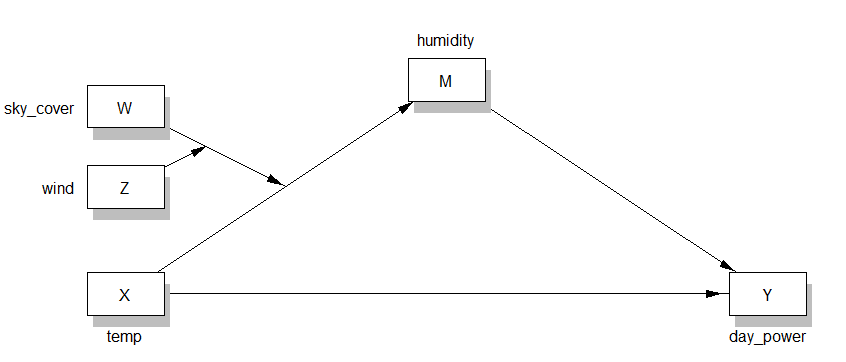

 X : temp(기온)  
M : humidity(습도)  
Y : day_power(태양광 발전량)  
W : sky_cover(운량)  
Z : wind(풍속)  



## * 퍼지화 
- X, M, Z : 일평균 데이터이므로 spread를 (다음날 - 현재) / 2 로 사용하여 삼각퍼지숫자 생성  
(마지막 data는 직전 spread 사용)  
- Y : crisp data
- W : 1~8 척도를 가지고 측정했으므로 설문조사와 같은 이유지만 조금 더 fuzzy하다고 생각하여 1 spread 사용하여 삼각퍼지숫자 생성

In [ ]:
data_18 = pd.read_csv('/content/Drive/MyDrive/논문/model_18.csv')
data_18.head()

,temp,wind,humidity,barometer,day_power,sky_cover
0,0.312052,0.234784,0.778769,0.638520,0.058824,2
1,0.369939,0.412924,0.725910,0.424439,0.058824,3
2,0.352761,0.572187,0.709644,0.296313,0.058824,5
3,0.348520,0.334605,0.751113,0.118489,0.029412,3
4,0.348466,0.313384,0.735478,0.160241,0.029412,6


In [ ]:
len(data_18)

1332

* temp, wind, humidity 퍼지화

In [ ]:
data = data_18['temp']
X_fuz = []
for i in range(len(data)-1):
  spread = np.abs(data[i] - data[i+1]) / 2
  X_fuz.append([data[i] - spread, data[i], data[i] + spread])
X_fuz.append([data[len(data)-1] - spread, data[len(data)-1], data[len(data)-1] + spread])

In [ ]:
X_fuz = np.array(X_fuz)
X_fuz

array([[0.28310838, 0.31205181, 0.34099523],
       [0.36134969, 0.36993865, 0.37852761],
       [0.35064017, 0.35276074, 0.3548813 ],
       ...,
       [0.22226483, 0.25710634, 0.29194785],
       [0.30696575, 0.32678937, 0.34661299],
       [0.26731851, 0.28714213, 0.30696575]])

In [ ]:
data = data_18['wind']
Z_fuz = []
for i in range(len(data)-1):
  spread = np.abs(data[i] - data[i+1]) / 2
  Z_fuz.append([data[i] - spread, data[i], data[i] + spread])
Z_fuz.append([data[len(data)-1] - spread, data[len(data)-1], data[len(data)-1] + spread])

In [ ]:
Z_fuz = np.array(Z_fuz)
Z_fuz

array([[0.14571496, 0.23478449, 0.32385403],
       [0.33329186, 0.41292356, 0.49255527],
       [0.4533958 , 0.57218697, 0.69097814],
       ...,
       [0.00877193, 0.10331384, 0.19785575],
       [0.26250812, 0.29239766, 0.3222872 ],
       [0.20272904, 0.23261858, 0.26250812]])

In [ ]:
data = data_18['humidity']
M_fuz = []
for i in range(len(data)-1):
  spread = np.abs(data[i] - data[i+1]) / 2
  M_fuz.append([data[i] - spread, data[i], data[i] + spread])
M_fuz.append([data[len(data)-1] - spread, data[len(data)-1], data[len(data)-1] + spread])

In [ ]:
M_fuz = np.array(M_fuz)
M_fuz

array([[0.75233957, 0.77876915, 0.80519874],
       [0.71777698, 0.72590998, 0.73404298],
       [0.68890934, 0.70964398, 0.73037862],
       ...,
       [0.78451541, 0.80918683, 0.83385826],
       [0.72049462, 0.75984399, 0.79919335],
       [0.6417959 , 0.68114526, 0.72049462]])

* sky cover 퍼지화

In [ ]:
W_fuz = np.array([data_18['sky_cover'] - 1, data_18['sky_cover'], data_18['sky_cover'] + 1]).T
W_fuz

array([[1, 2, 3],
       [2, 3, 4],
       [4, 5, 6],
       ...,
       [1, 2, 3],
       [6, 7, 8],
       [3, 4, 5]])

In [ ]:
row, col = W_fuz.shape

In [ ]:
for i in range(row):    # 1~8 이므로 1보다 작거나 8보다 큰 부분 수정
  if W_fuz[i][0] < 1:
    W_fuz[i][0] = 1
  elif W_fuz[i][2] >8:
    W_fuz[i][2] = 8

* day_power crisp

In [ ]:
Y_fuz = np.array([data_18['day_power'], data_18['day_power'], data_18['day_power']]).T
Y_fuz

array([[0.05882353, 0.05882353, 0.05882353],
       [0.05882353, 0.05882353, 0.05882353],
       [0.05882353, 0.05882353, 0.05882353],
       ...,
       [0.08823529, 0.08823529, 0.08823529],
       [0.        , 0.        , 0.        ],
       [0.17647059, 0.17647059, 0.17647059]])

In [ ]:
Y_fuz.shape

(1332, 3)

In [ ]:
one = np.ones((1332,3))

In [ ]:
XW_fuz = X_fuz * W_fuz
XZ_fuz = X_fuz * Z_fuz
WZ_fuz = W_fuz * Z_fuz
XWZ_fuz = X_fuz * W_fuz * Z_fuz

* M(humidity)

In [ ]:
X_mat = np.array([one, X_fuz, W_fuz, Z_fuz, XW_fuz, XZ_fuz, WZ_fuz, XWZ_fuz])
X_mat.shape

(8, 1332, 3)

In [ ]:
col, row, tri = X_mat.shape
print(col, row, tri)

8 1332 3


In [ ]:
XX = np.zeros((col,col))
for i in range(col):
  for j in range(col):
    sum = 0
    for k in range(row):
      sum = sum + np.dot(X_mat[i][k], X_mat[j][k])
    XX[i][j] = sum

In [ ]:
XY = np.zeros((col, 1))
for i in range(col):
  sum = 0
  for k in range(row):
    sum = sum + np.dot(X_mat[i][k], M_fuz[k])
  XY[i] = sum

In [ ]:
XX_inv = np.linalg.inv(XX)

In [ ]:
beta_M = XX_inv @ XY
for i in range(len(beta_M)):
  print(beta_M[i])

[0.85028401]
[-0.8038117]
[0.01162063]
[-0.73260316]
[0.05662157]
[1.63422923]
[0.09740813]
[-0.22804054]


In [ ]:
cov_mat = XX_inv

In [ ]:
cov_mat.shape

(8, 8)

In [ ]:
M_fuz_hat = 0.8503-0.8038*X_fuz+0.0116*W_fuz-0.7326*Z_fuz+0.0566*X_fuz*W_fuz+1.6342*X_fuz*Z_fuz+0.09741*W_fuz*Z_fuz-0.2280*X_fuz*W_fuz*Z_fuz

In [ ]:
mse = ((M_fuz - M_fuz_hat) ** 2).sum(axis=1).sum() / 1324
print(mse)

0.056207242753734676


In [ ]:
M_fuz

array([[0.75233957, 0.77876915, 0.80519874],
       [0.71777698, 0.72590998, 0.73404298],
       [0.68890934, 0.70964398, 0.73037862],
       ...,
       [0.78451541, 0.80918683, 0.83385826],
       [0.72049462, 0.75984399, 0.79919335],
       [0.6417959 , 0.68114526, 0.72049462]])

In [ ]:
t_rv = t(df=1324)

In [ ]:
se_0 = np.sqrt(cov_mat[0][0] * mse)
se_0

0.04509230426291154

In [ ]:
t_0 = 0.8503 / se_0 # 상수의 t_value
t_0

18.856876220880388

In [ ]:
p_0 = (1 - t_rv.cdf(t_0)) * 2 # p_value
p_0

0.0

In [ ]:
se_1 = np.sqrt(cov_mat[1][1] * mse)
se_1

0.09582138120297234

In [ ]:
t_1 = -0.8038 / se_1 # t통계량값
t_1

-8.388524459873539

In [ ]:
p_1 = (t_rv.cdf(t_1)) * 2 # p_value
p_1

1.2462263457578828e-16

In [ ]:
se_2 = np.sqrt(cov_mat[2][2] * mse)
se_2

0.011327851909148885

In [ ]:
t_2 = 0.0116 / se_2 # t통계량값
t_2

1.0240246865013583

In [ ]:
p_2 = (1- t_rv.cdf(t_2)) * 2 # p_value
p_2

0.3060106726338665

In [ ]:
se_3 = np.sqrt(cov_mat[3][3] * mse)
se_3

0.1567591252318811

In [ ]:
t_3 = -0.7326 / se_3 # t통계량값
t_3

-4.673412146924934

In [ ]:
p_3 = (t_rv.cdf(t_3)) * 2 # p_value
p_3

3.264557728231988e-06

In [ ]:
se_4 = np.sqrt(cov_mat[4][4] * mse)
se_4

0.024223910805329617

In [ ]:
t_4 = 0.0566 / se_4 # t통계량값
t_4

2.3365343628802977

In [ ]:
p_4 = (1-t_rv.cdf(t_4)) * 2 # p_value
p_4

0.019611930518490972

In [ ]:
se_5 = np.sqrt(cov_mat[5][5] * mse)
se_5

0.349220260369788

In [ ]:
t_5 = 1.6342 / se_5 # t통계량값
t_5

4.679568127775726

In [ ]:
p_5 = (1-t_rv.cdf(t_5)) * 2 # p_value
p_5

3.1696085356358594e-06

In [ ]:
se_6 = np.sqrt(cov_mat[6][6] * mse)
se_6

0.036648112772175945

In [ ]:
t_6 = 0.0974 / se_6 # t통계량값
t_6

2.657708477527613

In [ ]:
p_6 = (1-t_rv.cdf(t_6)) * 2 # p_value
p_6

0.007962091315448783

In [ ]:
se_7 = np.sqrt(cov_mat[7][7] * mse)
se_7

0.0811563110043667

In [ ]:
t_7 = -0.2280 / se_7 # t통계량값
t_7

-2.8093933445019728

In [ ]:
p_7 = (t_rv.cdf(t_7)) * 2 # p_value
p_7

0.0050364905612384015

In [ ]:
print(p_0)
print(p_1)
print(p_2)
print(p_3)
print(p_4)
print(p_5)
print(p_6)
print(p_7)

0.0
1.2462263457578828e-16
0.3060106726338665
3.264557728231988e-06
0.019611930518490972
3.1696085356358594e-06
0.007962091315448783
0.0050364905612384015


----

* Y(day_power)

In [ ]:
X_mat = np.array([one, X_fuz, M_fuz])
X_mat.shape

(3, 1332, 3)

In [ ]:
col, row, tri = X_mat.shape
print(col, row, tri)

3 1332 3


In [ ]:
XX = np.zeros((col,col))
for i in range(col):
  for j in range(col):
    sum = 0
    for k in range(row):
      sum = sum + np.dot(X_mat[i][k], X_mat[j][k])
    XX[i][j] = sum

In [ ]:
XY = np.zeros((col, 1))
for i in range(col):
  sum = 0
  for k in range(row):
    sum = sum + np.dot(X_mat[i][k], Y_fuz[k])
  XY[i] = sum

In [ ]:
XX_inv = np.linalg.inv(XX)

In [ ]:
beta_Y = XX_inv @ XY
for i in range(len(beta_Y)):
  print(beta_Y[i])

[0.54316616]
[0.53475353]
[-0.75490258]


In [ ]:
Y_fuz_hat = 0.5432+0.5348*X_fuz-0.7549*M_fuz

* R^2 & F

In [ ]:
TSS = ((Y_fuz-Y_fuz.mean())**2).sum(axis=1).sum()
SSR = ((Y_fuz_hat-Y_fuz.mean())**2).sum(axis=1).sum()
SSE = ((Y_fuz-Y_fuz_hat)**2).sum(axis=1).sum()

In [ ]:
R = 1 - SSE / TSS
print(R)

0.6447466269855189


In [ ]:
F = (SSR/2) / (SSE/1329)
print(F)

1206.0803949576175


In [ ]:
f_rv = f(2, 1329)

In [ ]:
1 - f_rv.cdf(F) # F-value 

1.1102230246251565e-16

----

In [ ]:
cov_mat = XX_inv

In [ ]:
Y_fuz_hat = 0.5432+0.5348*X_fuz-0.7549*M_fuz

In [ ]:
mse = ((Y_fuz - Y_fuz_hat) ** 2).sum(axis=1).sum() / 1329
print(mse)

0.06202498507954149


In [ ]:
t_rv = t(df=1329)

In [ ]:
se_0 = np.sqrt(cov_mat[0][0] * mse)
se_0

0.024359855724624062

In [ ]:
t_0 = 0.5432 / se_0 # 상수의 t_value
t_0

22.298982643436123

In [ ]:
p_0 = (1 - t_rv.cdf(t_0)) * 2 # p_value
p_0

0.0

In [ ]:
se_1 = np.sqrt(cov_mat[1][1] * mse)
se_1

0.023443829724934723

In [ ]:
t_1 = 0.5348 / se_1 # t통계량값
t_1

22.8119725435128

In [ ]:
p_1 = (1-t_rv.cdf(t_1)) * 2 # p_value
p_1

0.0

In [ ]:
se_2 = np.sqrt(cov_mat[2][2] * mse)
se_2

0.026514364677054134

In [ ]:
t_2 = -0.7549 / se_2 # t통계량값
t_2

-28.471359174345974

In [ ]:
p_2 = (t_rv.cdf(t_2)) * 2 # p_value
p_2

1.3310655105224113e-139

In [ ]:
print(p_0)
print(p_1)
print(p_2)

0.0
0.0
1.3310655105224113e-139


## * 𝑀=0.9370-0.9212𝑋-0.0035𝑊-0.9191𝑍+0.0777𝑋𝑊+2.0611𝑋𝑍+0.1339𝑊𝑍-0.3276𝑋𝑊𝑍 (crisp)
## * 𝑌=0.6099+0.4950𝑋-0.8307𝑀 (crisp)

  
## * 𝑀=0.8503-0.8038*X+0.0116*W-0.7326*Z+0.0566*X*W+1.6342*X*Z+0.0974*W*Z-0.2280*X*W*Z (fuzzy)
## * 𝑌=0.5432+0.5348*X-0.7549*M (fuzzy)

----